In [17]:
import pandas as pd
import numpy as np
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols

In this document we will be going over my Stand-Up Comedy transcript data set

In [4]:
df = pd.read_csv("Clustered.csv")
df

,Unnamed: 0,title,link,CSV,year,Total_Tokens,Unique_Tokens,Avg_Token_Length,Lex_Diversity,Most_Frequent_Words,...,rating,ID,bad_words,Bigrams,Trigrams,Stories,Political,UK,Not_Clean,cluster_LDA
0,0,Hasan Minhaj Homecoming King,https://scrapsfromtheloft.com/comedy/hasan-min...,hasan-minhaj-homecoming-king-transcript.txt,NaN,2807,1074,5.031706,0.382615,"('know', 55)('like', 49)('get', 46)('going', 3...",...,8.3,6900644,9,"[('orchestral', 'bring'), ('bring', 'back'), (...","[('orchestral', 'bring', 'back'), ('bring', 'b...",0.874884,0.100072,0.000676,0.024368,1
1,1,Aziz Ansari Live In Madison Square Garden 2015...,https://scrapsfromtheloft.com/comedy/aziz-ansa...,aziz-ansari-live-in-madison-square-garden-2015...,2015.0,2830,956,5.239929,0.337809,"('like', 66)('get', 60)('gonna', 39)('one', 36...",...,6.6,4530184,13,"[('thank', 'new'), ('new', 'holy'), ('holy', '...","[('thank', 'new', 'holy'), ('new', 'holy', 'ma...",0.968321,0.000562,0.001299,0.029817,1
2,2,Bert Kreischer Fighting A Bear,https://scrapsfromtheloft.com/comedy/bert-krei...,bert-kreischer-fighting-a-bear-transcript.txt,NaN,274,195,5.251825,0.711679,"('bear', 14)('get', 6)('one', 5)('look', 5)('k...",...,NaN,2400374,3,"[('bert', 'let'), ('let', 'hear'), ('hear', 'f...","[('bert', 'let', 'hear'), ('let', 'hear', 'fou...",0.983824,0.005355,0.005666,0.005154,1
3,3,Kevin Bridges Story So Far Live Glasgow,https://scrapsfromtheloft.com/comedy/kevin-bri...,kevin-bridges-story-so-far-live-glasgow-transc...,NaN,2693,1091,5.347196,0.405124,"('get', 53)('got', 51)('guy', 36)('like', 32)(...",...,7.8,7379330,7,"[('crossroads', 'getting'), ('getting', 'drown...","[('crossroads', 'getting', 'drowned'), ('getti...",0.220687,0.239186,0.539599,0.000528,2
4,4,Tom Segura Disgraceful 2018,https://scrapsfromtheloft.com/comedy/tom-segur...,tom-segura-disgraceful-2018-full-transcript.txt,2018.0,2321,928,5.154675,0.399828,"('like', 53)('know', 48)('get', 41)('want', 38...",...,7.6,246644,11,"[('tom', 'new'), ('new', 'netflix'), ('netflix...","[('tom', 'new', 'netflix'), ('new', 'netflix',...",0.844018,0.008701,0.101250,0.046031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,Chris Rock Total Blackout The Tamborine Extend...,https://scrapsfromtheloft.com/comedy/chris-roc...,chris-rock-total-blackout-the-tamborine-extend...,NaN,3314,1054,5.073929,0.318045,"('get', 84)('got', 81)('know', 54)('fucking', ...",...,6.6,15318740,14,"[('white', 'house'), ('house', 'white'), ('whi...","[('white', 'house', 'white'), ('house', 'white...",0.000507,0.000501,0.000501,0.998491,3
337,337,Bill Hicks Relentless 1992,https://scrapsfromtheloft.com/comedy/bill-hick...,bill-hicks-relentless-1992-transcript.txt,1992.0,2155,965,5.284919,0.447796,"('fucking', 57)('know', 45)('one', 26)('like',...",...,8.6,8372676,5,"[('centaur', 'theatre'), ('theatre', 'annual')...","[('centaur', 'theatre', 'annual'), ('theatre',...",0.000659,0.998046,0.000648,0.000648,0
338,338,Gabriel Iglesias Im Not Fat Im Fluffy 2009,https://scrapsfromtheloft.com/comedy/gabriel-i...,gabriel-iglesias-im-not-fat-im-fluffy-2009-ful...,2009.0,2518,912,4.965846,0.362192,"('got', 55)('know', 51)('like', 35)('one', 34)...",...,8.1,439784,3,"[('el', 'give'), ('give', 'gabriel'), ('gabrie...","[('el', 'give', 'gabriel'), ('give', 'gabriel'...",0.997635,0.000781,0.000757,0.000828,1
339,339,Katt Williams Great America,https://scrapsfromtheloft.com/comedy/katt-will...,katt-williams-great-america-transcript.txt,NaN,2433,796,5.089601,0.327168,"('got', 62)('know', 56)('fuck', 49)('get', 46)...",...,6.2,8328418,12,"[('seen', 'seen'), ('seen', 'american'), ('ame...","[('seen', 'seen', 'american'), ('seen', 'ameri...",0.000722,0.000717,0.000710,0.997852,3


In [5]:
anovadf = pd.DataFrame()
anovadf["Clusters"] = df["cluster_LDA"]
anovadf["Rating"] = df["rating"]

In [7]:
aov = pg.anova(dv='Rating', between='Clusters', data=anovadf,detailed=True)
aov.round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Clusters,22.645,6,3.774,5.62,0.0,0.102
1,Within,200.105,298,0.671,NaN,NaN,NaN


<AxesSubplot:title={'center':'Rating'}, xlabel='Clusters'>

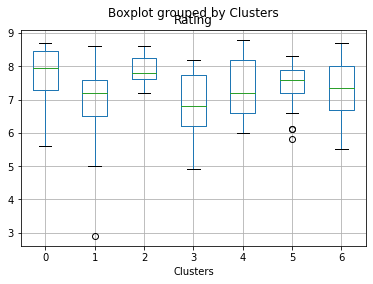

In [15]:
anovadf.boxplot("Rating", by="Clusters")

In [19]:
mod = ols("Rating ~ Clusters", data= anovadf).fit()
aov_table = sm.stats.anova_lm(mod,typ=2)
print(aov_table)

              sum_sq     df         F    PR(>F)
Clusters    0.753876    1.0  1.028956  0.311213
Residual  221.996419  303.0       NaN       NaN
